In [1]:

# Clustering

RUN_COUNT = 20000

import sys
sys.path.append("/Users/chuebner/development/python/biclustering")

from inference import build_model,\
                      plot_hard_clustering,\
                      plot_cluster_means,\
                      display_map_axis_mapping,\
                      get_map_item,\
                      show_plots
from data_generator import generate_data
import numpy as np
import pandas as pd

snv_table2 = pd.read_csv('data.tsv', sep='\t')

data_table = (
    snv_table2
    .set_index(['event_id', 'origin_node', 'plot_id'])
    [['ref_counts', 'alt_counts', 'total_raw_e', 'tumour_content', 'ccf']].unstack())

node = {}
node['location_indicies'] = data_table.reset_index(level=1)['origin_node'].values
node['cluster_indicies'] = ((data_table['ccf'].groupby(level=1).mean() > 0.5) * 1).values
node['axis_dp_alpha'] = 1.0

ref_counts = data_table['ref_counts'].values

alt_counts = data_table['alt_counts'].values

total_raw_e = data_table['total_raw_e'].values

tumour_content = data_table['tumour_content'].values

model, trace = build_model(ref_counts, alt_counts, total_raw_e, tumour_content, RUN_COUNT,start=node)



/Users/chuebner/miniconda3/envs/ml/lib/python3.6/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
Assigned CategoricalGibbsMetropolis to tumour_copies
100%|██████████| 20000/20000 [7:02:44<00:00,  1.26s/it]


In [7]:

indices = get_map_item(model, trace, 'location_indicies')
print(indices)

[ 2  1 15 11  0  7 16  1  8  0  8  5 10  8  7  6  6  6  9  6  9 10 20  0  4
 20  7  7  7  7  5  5  0  0 11 10 10 13  4  9  0  0 14 14  8 10 10  6  1  9
  0 10  0  4 11  7  4  6  0  1  1  7  6  1  0  9 11  4 10  0  0 20 10  0  4
  1 11  0  4 13  3 11  4 11 20  4  9  6  5  2  4  6  8 20 10  4  0 15  9 16
  7  9  0 11  0  6  8  7  0  0  3  0 10  7 16  9  7 19  2  3 19  0 20 10 11
  1  1 19 13  7  2  7 20  2  0 11 11 16 10 10  2 10  2  4 12  8 10  8  4  0
 15  1  9 11  4 16  1  7  7  7  4  7  2 11 20 13  0  5  5  9  7 11  7  4  4
 16  2  7 10 13  0  0  0  0 13 10  0  0  0 13 15  7  0 10  0  7  8  3 20  6
  9  4  1  7 16  3  4  8 13  6  8  6 20  7  7  0  8 11  9  1 20 14  3  7  7
  9  4  0  8  1  3  8]


[[ 0.99358864  0.52476599  0.50976895  0.53865083  0.50215746  0.99431449]
 [ 0.00918954  0.00601915  0.00436439  0.00471091  0.00666964  0.01036758]
 [ 0.00918954  0.00601915  0.20571557  0.53865083  0.00666964  0.01036758]
 [ 0.00918954  0.52476599  0.50976895  0.53865083  0.00666964  0.01036758]
 [ 0.00918954  0.00601915  0.00436439  0.00471091  0.50215746  0.01036758]
 [ 0.49971028  0.00601915  0.00436439  0.00471091  0.00666964  0.01036758]
 [ 0.00918954  0.00601915  0.12811984  0.00471091  0.00666964  0.01036758]
 [ 0.00918954  0.52476599  0.00436439  0.00471091  0.00666964  0.01036758]
 [ 0.99358864  0.00601915  0.00436439  0.00471091  0.00666964  0.99431449]
 [ 0.00918954  0.00601915  0.00436439  0.43102628  0.00666964  0.01036758]
 [ 0.49971028  0.00601915  0.00436439  0.00471091  0.00666964  0.45015267]
 [ 0.00918954  0.00601915  0.00436439  0.00471091  0.00666964  0.45015267]
 [ 0.00918954  0.00601915  0.50976895  0.00471091  0.00666964  0.01036758]
 [ 0.00918954  0.25738846

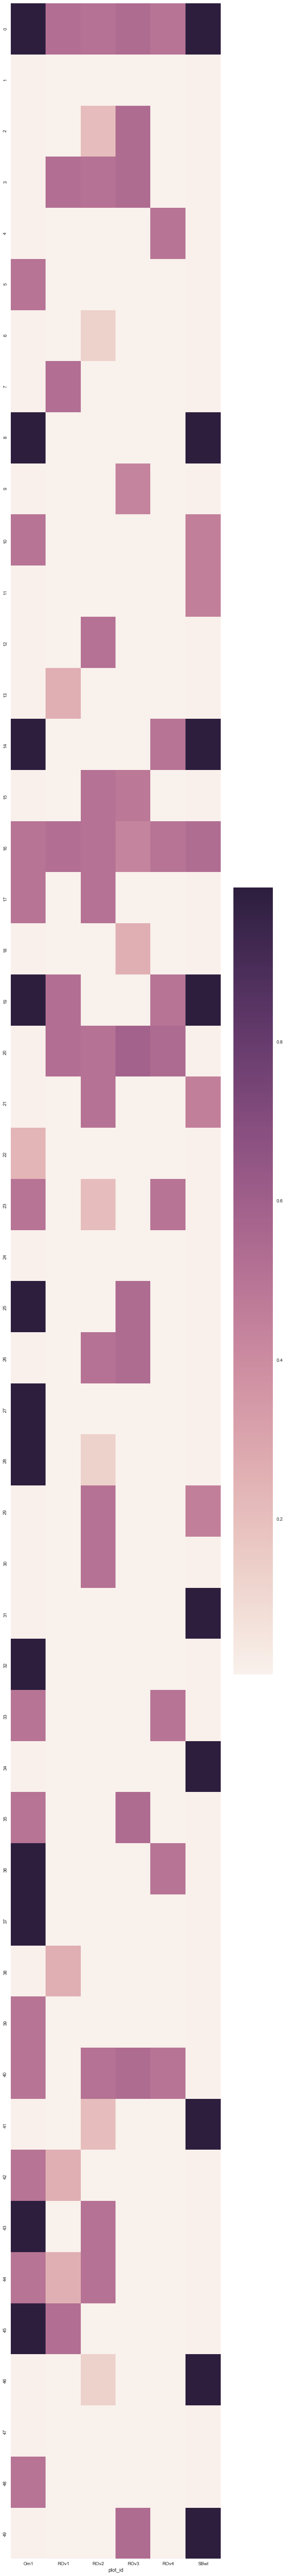

In [8]:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn

cluster_locations = get_map_item(model, trace, 'cluster_locations')
print(cluster_locations)
cluster_locations = pd.DataFrame(cluster_locations, columns=data_table['ref_counts'].columns)

fig = plt.figure(figsize=(10, 100))
ax = plt.gca()
seaborn.heatmap(cluster_locations, ax=ax)


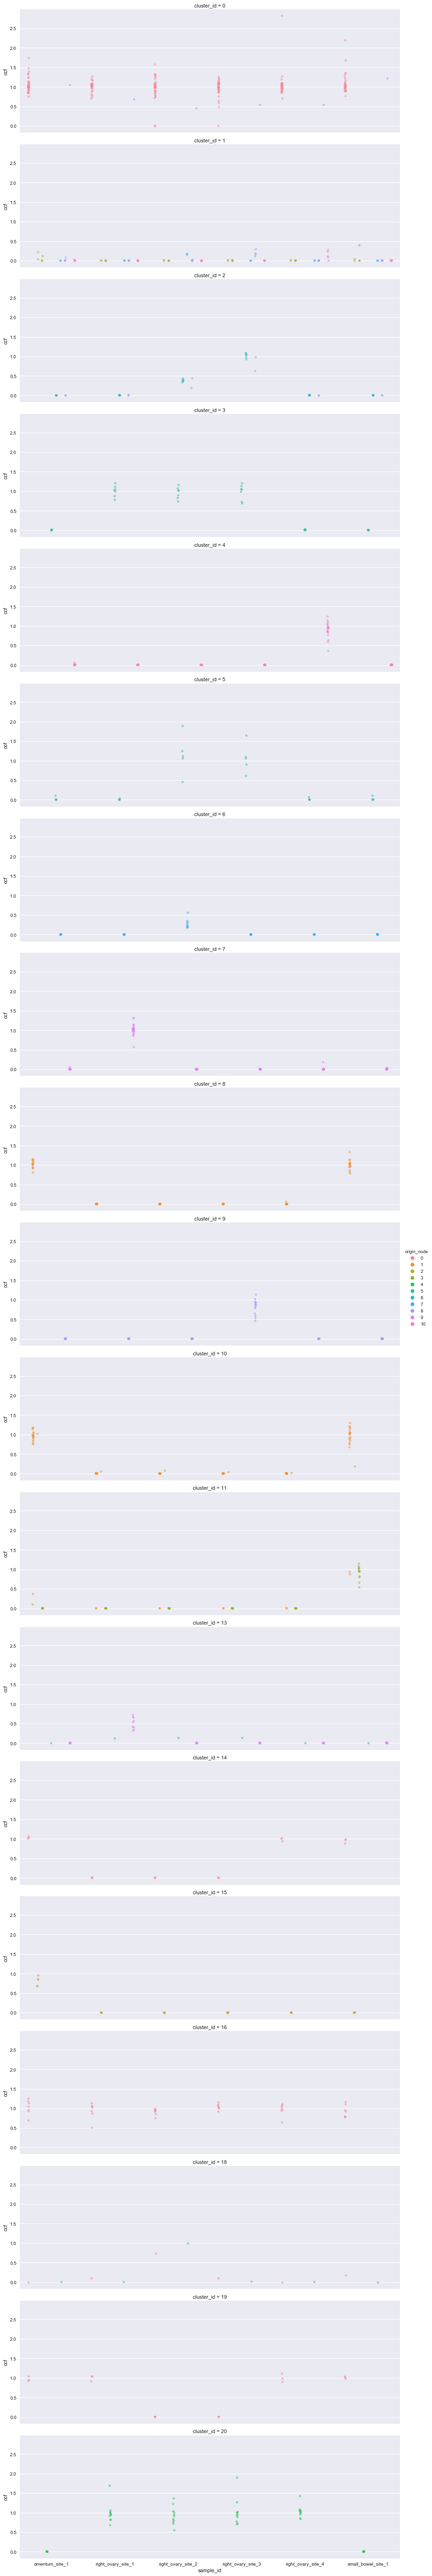

In [10]:
%matplotlib inline
import seaborn

indices = trace['location_indicies'][-1]
indices_table = pd.DataFrame({'cluster_id': indices}, index=data_table.index).reset_index()
snv_table3 = snv_table2.merge(indices_table)


indices_table.groupby('cluster_id').size()

seaborn.factorplot(
    hue='origin_node', y='ccf', x='sample_id', row='cluster_id',
    data=snv_table3, kind='strip', jitter=True, aspect=3, split=True, alpha=0.5)

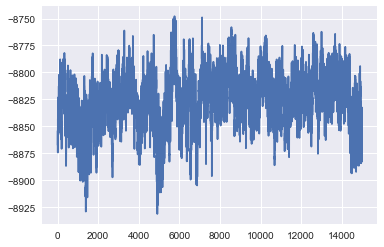

In [17]:
import matplotlib.pyplot as plt


plt.plot(trace["logP"][5000:])
plt.show()

In [6]:
trace["vaf"]

array([[[  1.21072556e-01,   3.40585488e-15,   2.50068155e-11,
           2.44378453e-01,   2.22413994e-13,   1.80805347e-04],
        [  1.79356181e-01,   4.81865448e-15,   2.98001153e-11,
           3.10916885e-01,   2.90039720e-13,   2.74889764e-04],
        [  1.21072556e-01,   3.40585488e-15,   2.72371829e-01,
           2.50466632e-01,   2.22413994e-13,   6.09121280e-02],
        ..., 
        [  1.59756843e-01,   4.81865448e-15,   3.24218329e-11,
           1.73466655e-11,   2.90039720e-13,   2.37477543e-04],
        [  1.59756843e-01,   4.81865448e-15,   3.53135486e-01,
           3.43160028e-01,   2.90039720e-13,   7.94584044e-02],
        [  2.34272792e-01,   8.23441178e-15,   4.60877729e-11,
           1.73466655e-11,   4.49729882e-13,   2.14730447e-01]],

       [[  1.24079266e-01,   3.16395134e-01,   2.61261849e-01,
           3.01701697e-01,   2.98889045e-01,   1.04348329e-01],
        [  1.79356602e-01,   4.14857117e-01,   3.32843255e-01,
           3.05786692e-01,   3.5

In [14]:
get_map_item(model, trace, 'cluster_indicies')[20]

array([2, 1, 1, 6, 4, 0])